<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

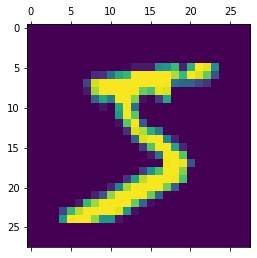

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

<h3 style='color:purple'>Using ANN for classification</h3>

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])



In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [13]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2659 - accuracy: 0.9239
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1242 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0881 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0676 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0552 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0437 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0355 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.020

In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0792 - accuracy: 0.9784


[0.07923975586891174, 0.9783999919891357]

In [15]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [17]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               507100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1580 - accuracy: 0.9538
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0536 - accuracy: 0.9835
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0346 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0158 - accuracy: 0.9950


In [20]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0349 - accuracy: 0.9897


[0.034859657287597656, 0.9897000193595886]